In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

#tworzenien lub pobranie sesji Spark
spark = SparkSession.builder \
    .appName("Analiza zamówień") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/27 12:17:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from pyspark.sql.types import StructType,StructField,IntegerType,StringType,DoubleType

#tworzenie schematu
schema = StructType([
    StructField("order_id", IntegerType(),True,),
    StructField("customer_id", IntegerType(),True,),
    StructField("category", StringType(),True,),
    StructField("amount", DoubleType(),True,)
])

In [7]:
data = [
    (1,101,"electronics",299.99),
    (2,102,"books",16.22),
    (3,103,"books",31.00),
    (4,104,"electronics",425.0),
    (5,105,"clothing",88.54),
    (6,107,"books",299.99),
]

In [8]:
df = spark.createDataFrame(data,schema)
df.show()

+--------+-----------+-----------+------+
|order_id|customer_id|   category|amount|
+--------+-----------+-----------+------+
|       1|        101|electronics|299.99|
|       2|        102|      books| 16.22|
|       3|        103|      books|  31.0|
|       4|        104|electronics| 425.0|
|       5|        105|   clothing| 88.54|
|       6|        107|      books|299.99|
+--------+-----------+-----------+------+



In [10]:
#filtrowanie zamówień powyzej 100zł
df.filter(df["amount"]>100).show()

+--------+-----------+-----------+------+
|order_id|customer_id|   category|amount|
+--------+-----------+-----------+------+
|       1|        101|electronics|299.99|
|       4|        104|electronics| 425.0|
|       6|        107|      books|299.99|
+--------+-----------+-----------+------+



In [11]:
#średnia wartość zamówienia w każdej kategorii
avg_by_category = df.groupBy("category").avg("amount")
avg_by_category.show()

+-----------+------------------+
|   category|       avg(amount)|
+-----------+------------------+
|      books|115.73666666666668|
|electronics|           362.495|
|   clothing|             88.54|
+-----------+------------------+



In [12]:
#konwersja do pandas
pdf = avg_by_category.toPandas()

In [13]:
import matplotlib.pyplot as plt

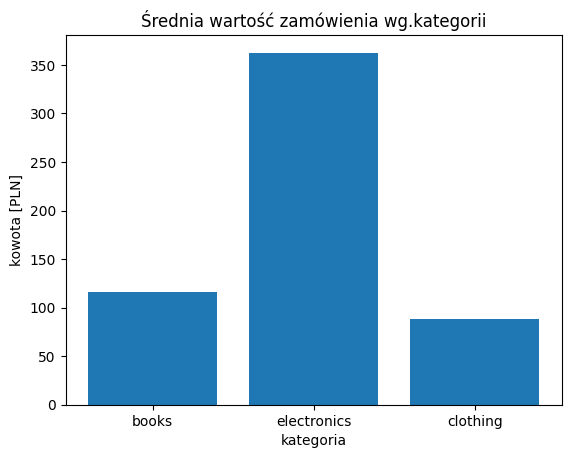

In [14]:
plt.bar(pdf["category"],pdf["avg(amount)"])
plt.title("Średnia wartość zamówienia wg.kategorii")
plt.ylabel("kowota [PLN]")
plt.xlabel("kategoria")
plt.show()